In [1]:
print("Hello, Jupyter!")


Hello, Jupyter!


In [2]:
!pip install pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd


In [4]:
!pip install chardet



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:


# Attempt to read the CSV with a different encoding
try:
    df = pd.read_csv('C:/Users/Srijana/Downloads/pregnancy_risk_prediction_dataset.csv', encoding='latin1')
except UnicodeDecodeError:
    print("Unicode decode error encountered. Trying a different encoding.")
    df = pd.read_csv('C:/Users/Srijana/Downloads/pregnancy_risk_prediction_dataset.csv', encoding='windows-1252')

# Display the first few rows to check if the file is loaded correctly
df.head()



,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [6]:


# Check for null values in the dataset

null_values = df.isnull().sum()

# Display columns with null values
print(null_values)


Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64


In [7]:
# Assuming the column is named 'PatientID'
df = df.drop(columns=['Patient ID'])


# Verify if the column has been removed
print(df.columns)


Index(['Name', 'Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


In [8]:
df=df.drop(columns=['Name'])

In [9]:
# Get basic statistics for numeric columns
df.describe()


,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


In [10]:
# Check the data types of each column
print(df.dtypes)


Age                                    int64
Body Temperature(F)                  float64
Heart rate(bpm)                        int64
Systolic Blood Pressure(mm Hg)         int64
Diastolic Blood Pressure(mm Hg)        int64
BMI(kg/m 2)                          float64
Blood Glucose(HbA1c)                   int64
Blood Glucose(Fasting hour-mg/dl)    float64
Outcome                               object
dtype: object


In [11]:
!pip install matplotlib --user




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install seaborn --user



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


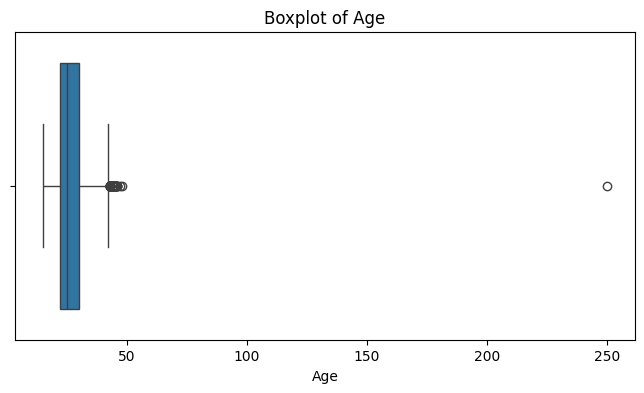

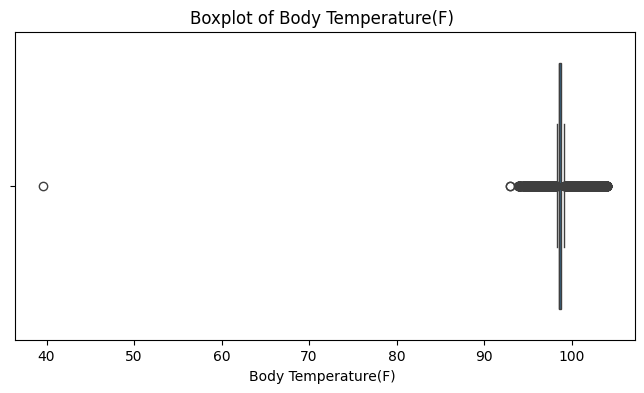

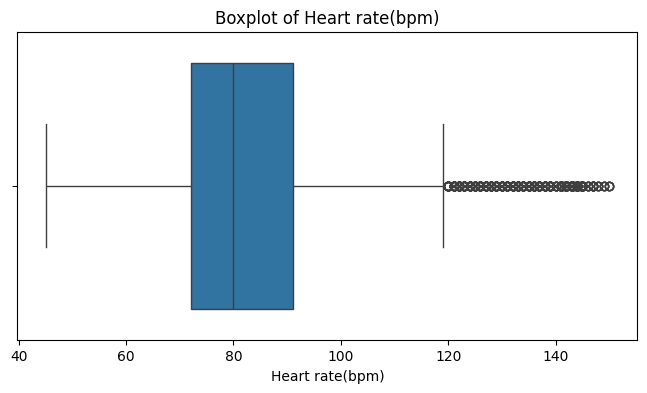

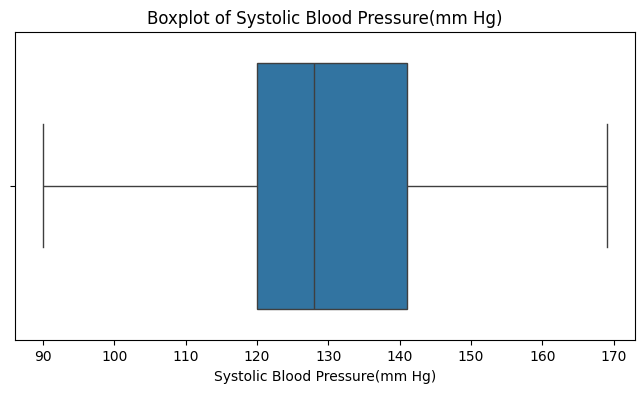

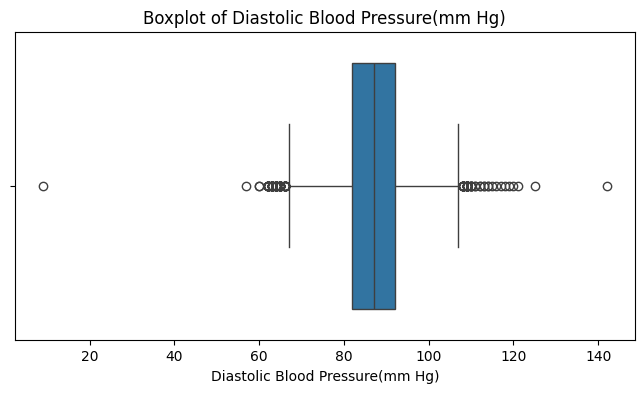

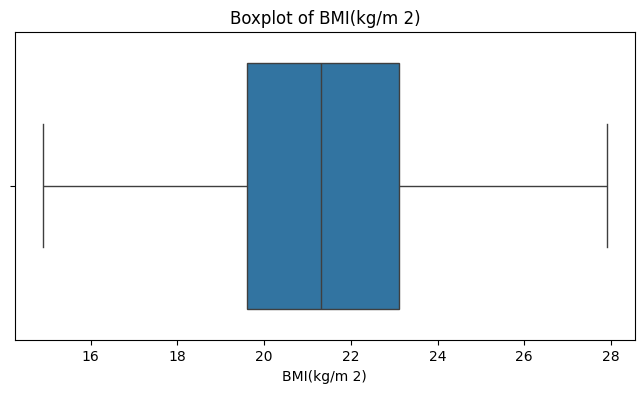

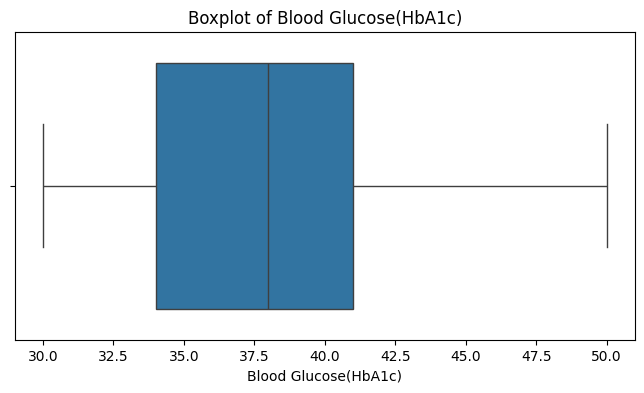

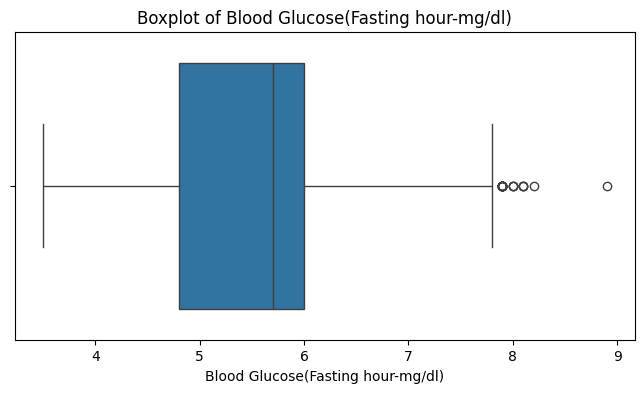

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each numeric column and create a box plot
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


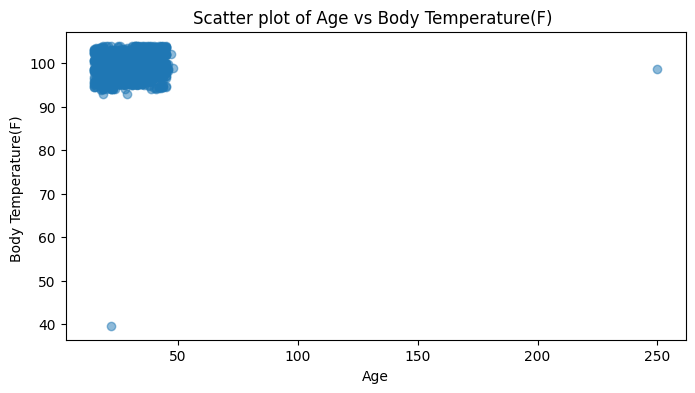

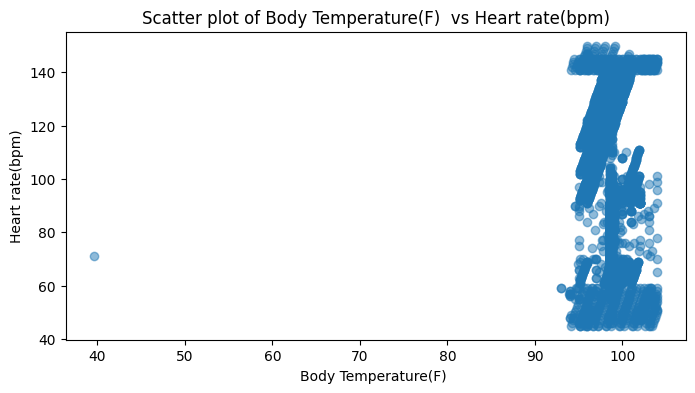

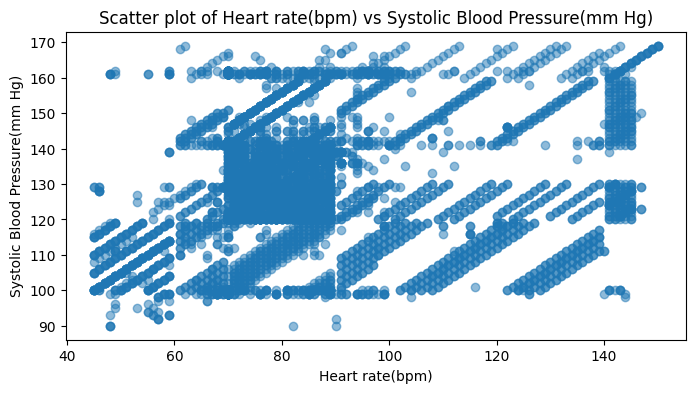

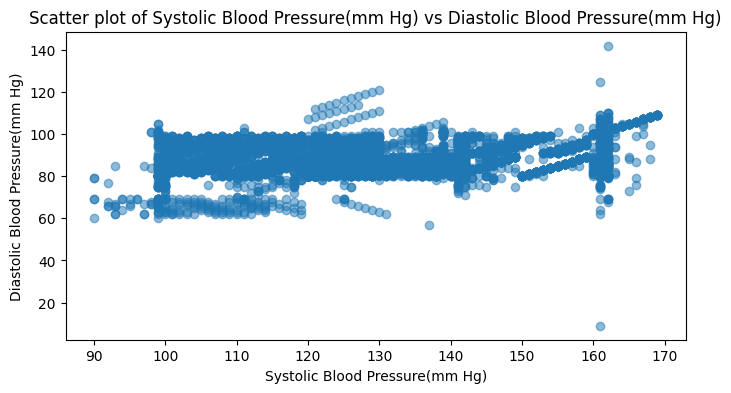

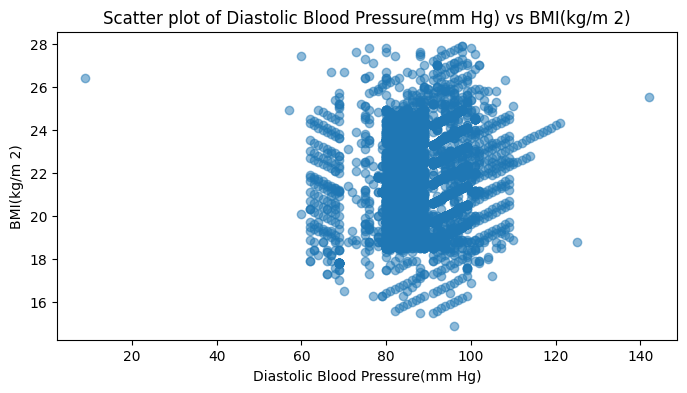

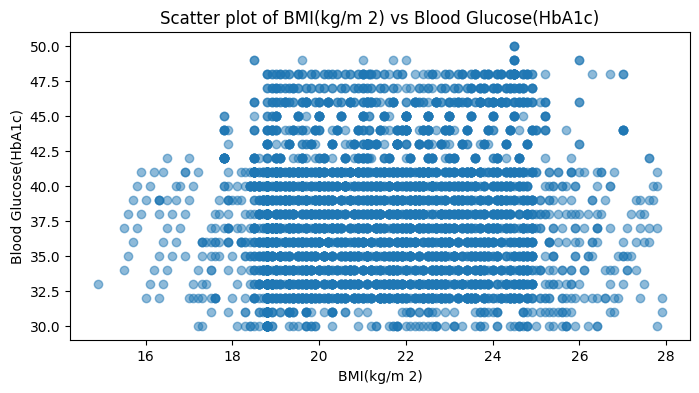

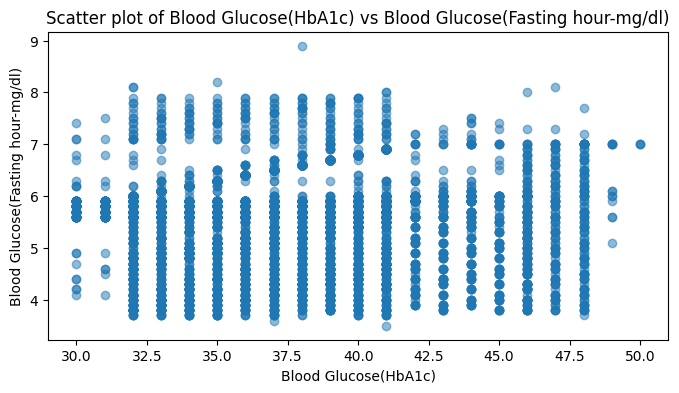

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns

for i in range(len(numeric_columns) - 1):
    plt.figure(figsize=(8, 4))
    
    # Scatter plot between two numeric columns
    plt.scatter(df[numeric_columns[i]], df[numeric_columns[i+1]], alpha=0.5)
    
    plt.title(f'Scatter plot of {numeric_columns[i]} vs {numeric_columns[i+1]}')
    plt.xlabel(numeric_columns[i])
    plt.ylabel(numeric_columns[i+1])
    
    plt.show()




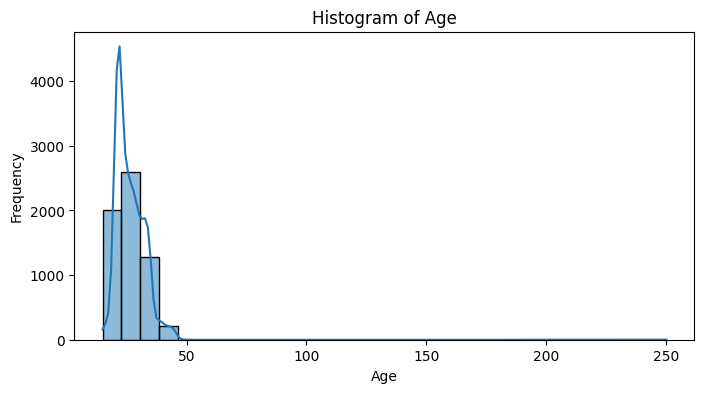

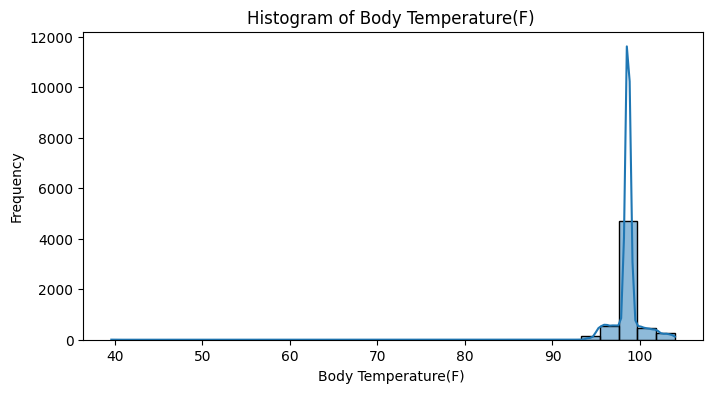

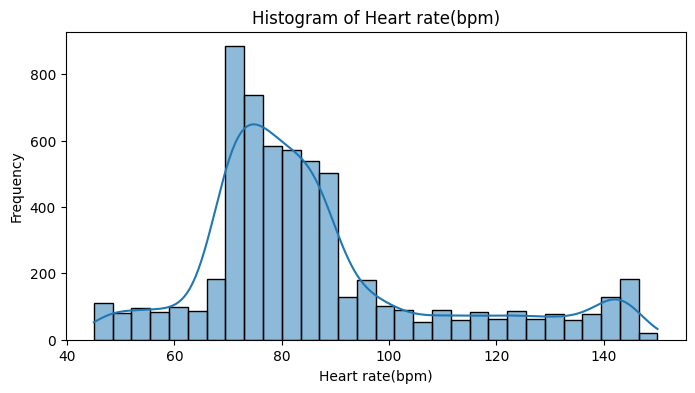

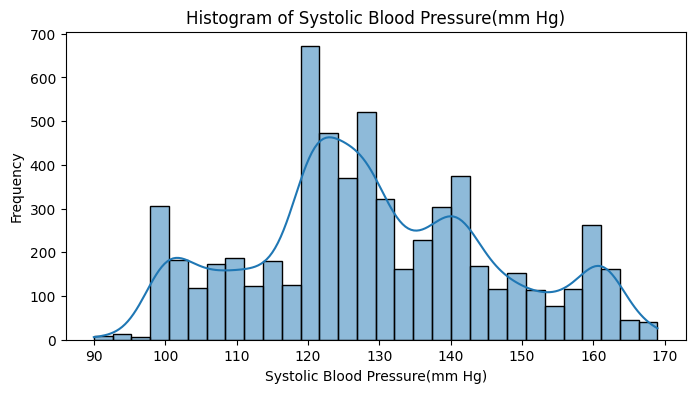

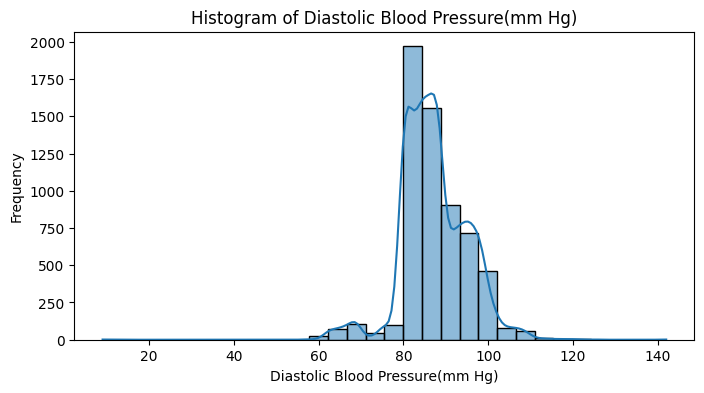

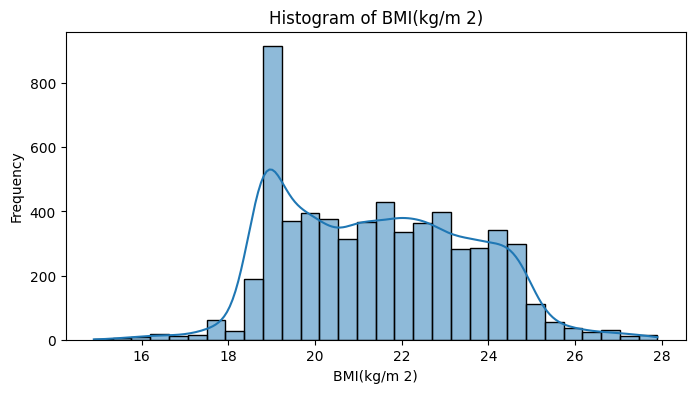

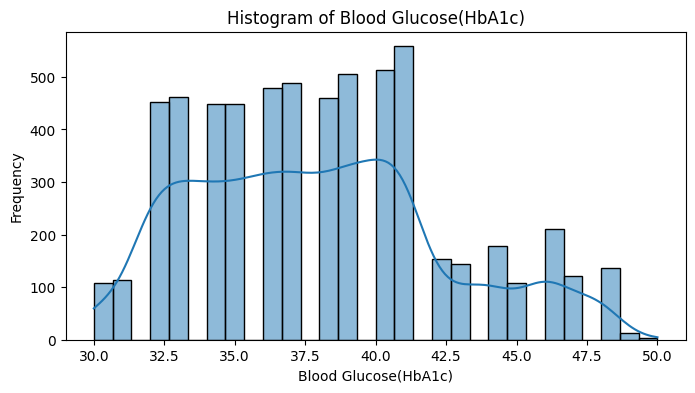

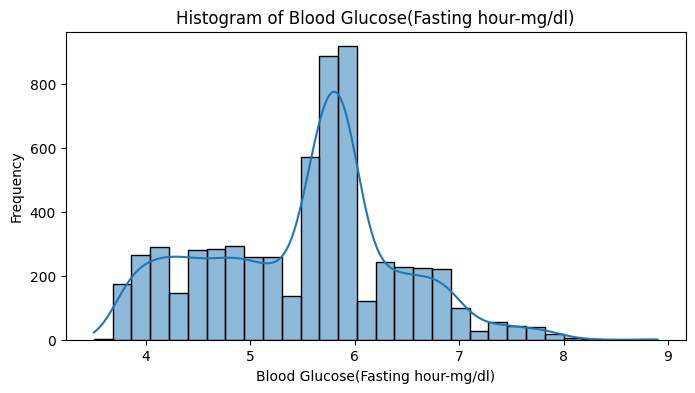

In [15]:


# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Loop through each numeric column and create a histogram
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    
    # Plot the histogram
    sns.histplot(df[column], kde=True, bins=30)  # kde=True adds a kernel density estimate line
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()


In [16]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


In [17]:
df_filtered = df[~((df['Age'] > 80) | ((df['Age'] < 12) | (df['Body Temperature(F)'] < 80)))]
print(df_filtered.head())

   Age  Body Temperature(F)  Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   20                 97.5               91                             161   
1   45                 97.7               99                              99   
2   29                 98.6               84                             129   
3   26                 99.5              135                             161   
4   38                102.5               51                             106   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                              100         24.9                    41   
1                               94         22.1                    36   
2                               87         19.0                    42   
3                              101         23.7                    46   
4                               91         18.8                    38   

   Blood Glucose(Fasting hour-mg/dl)    Outcome  
0                             

In [18]:
df.describe()


,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


In [19]:
df_filtered.describe()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000
mean,26.389117,98.675266,86.104901,129.217669,87.258154,21.435445,37.903622,5.504655
std,5.713950,1.400013,22.630101,17.236774,7.794307,2.157016,4.400658,0.905458
min,15.000000,93.000000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,48.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


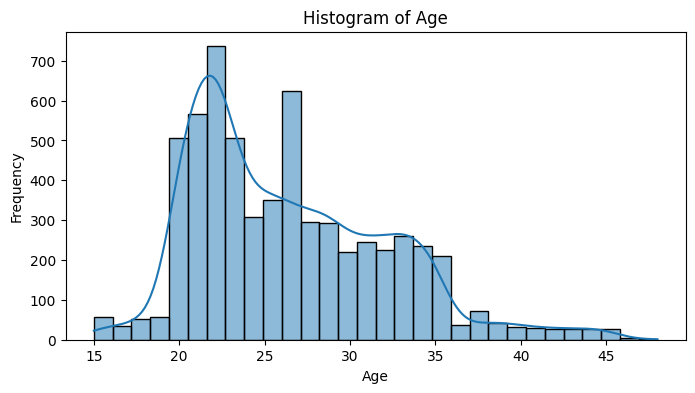

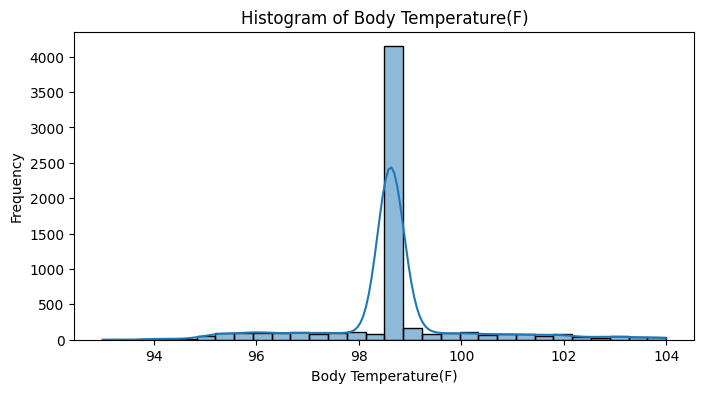

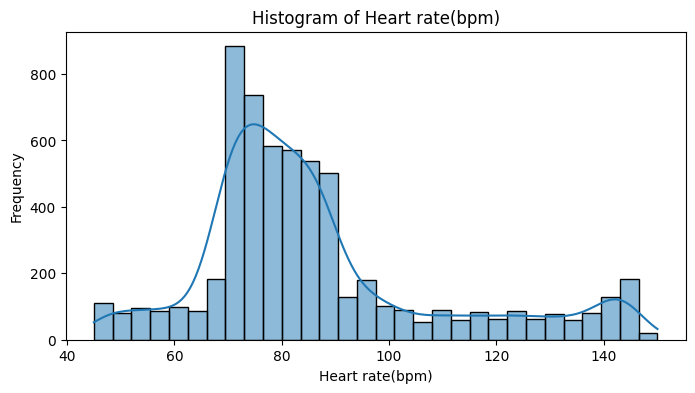

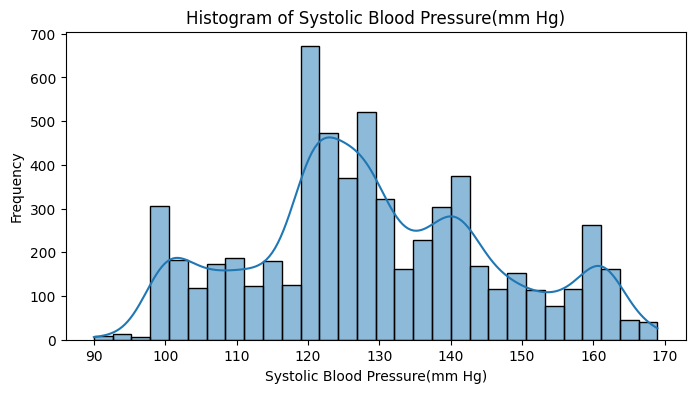

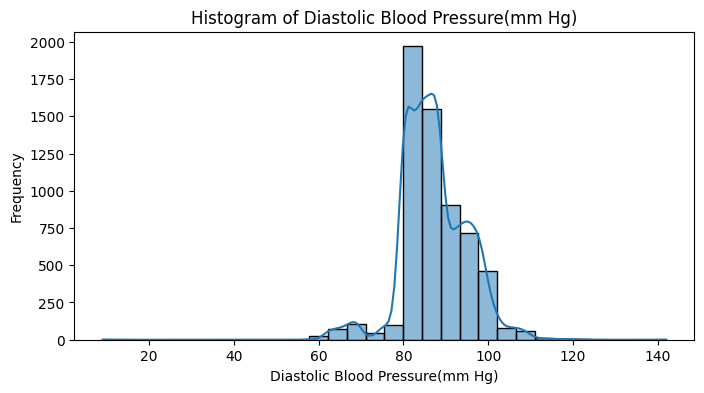

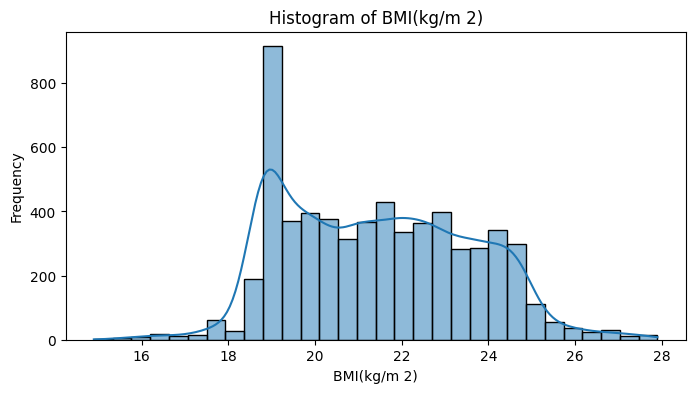

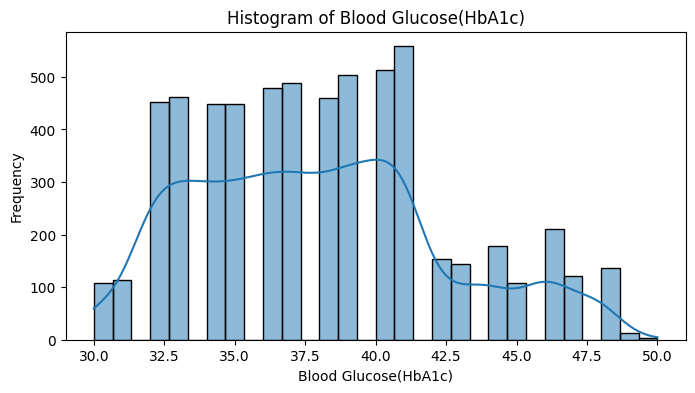

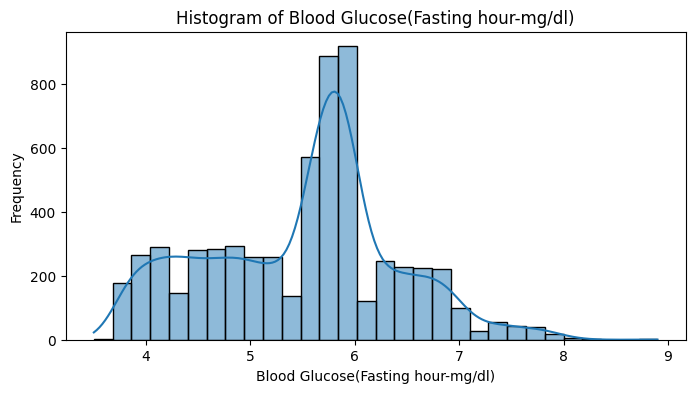

In [20]:
 #Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Loop through each numeric column and create a histogram
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    
    # Plot the histogram
    sns.histplot(df_filtered[column], kde=True, bins=30)  # kde=True adds a kernel density estimate line
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()

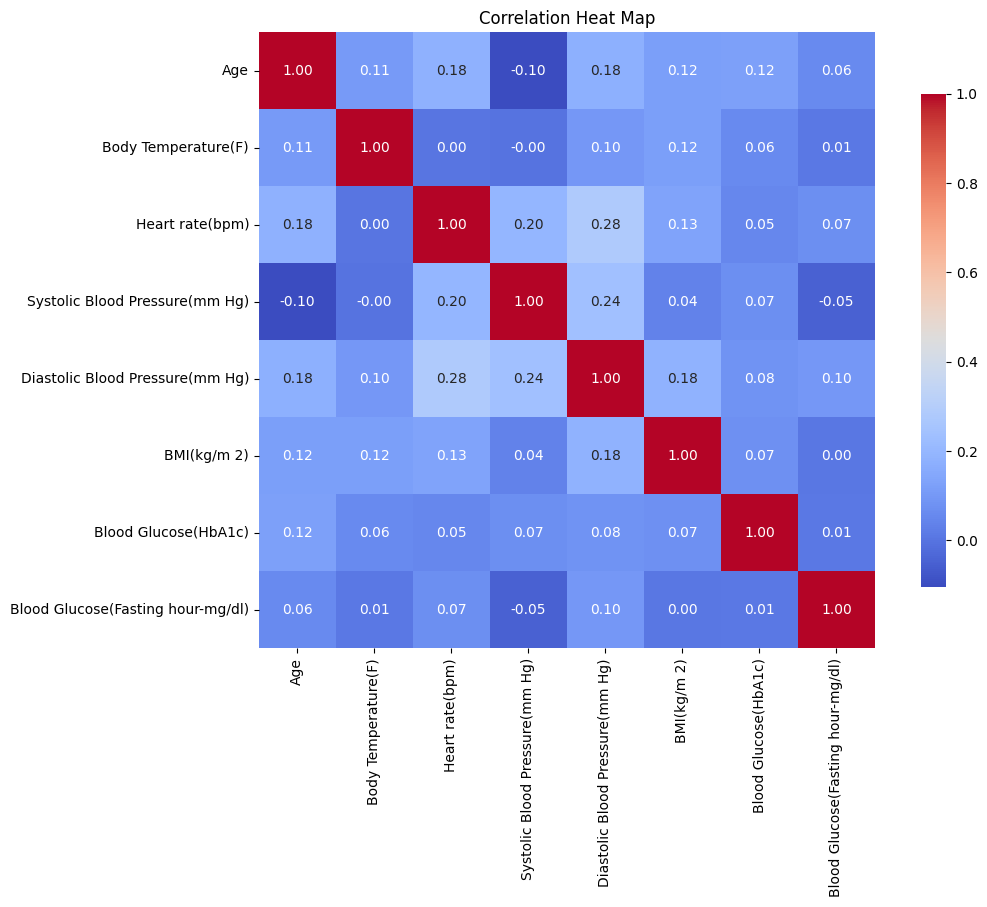

In [21]:
# Select only numeric columns for correlation
numeric_df = df_filtered.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heat Map')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming 'df' is your DataFrame and 'Pregnancy Risk' is the target
X = df_filtered.drop(columns=['Outcome'])
y = df_filtered['Outcome']

# Apply label encoding if needed
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = LabelEncoder().fit_transform(X[column])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit OneVsRest logistic regression
logreg = OneVsRestClassifier(LogisticRegression(max_iter=2000))
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5618345618345618
Confusion Matrix:
 [[177 118 102]
 [ 42 307  50]
 [118 105 202]]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.53      0.45      0.48       397
    low risk       0.58      0.77      0.66       399
    mid risk       0.57      0.48      0.52       425

    accuracy                           0.56      1221
   macro avg       0.56      0.56      0.55      1221
weighted avg       0.56      0.56      0.55      1221



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame and 'Pregnancy Risk' is the target
X = df_filtered.drop(columns=['Outcome'])
y = df_filtered['Outcome']

# Encode categorical features if needed
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = LabelEncoder().fit_transform(X[column])

# Scale the data (optional, but can improve performance for comparison with other models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9901719901719902
Confusion Matrix:
 [[391   1   5]
 [  1 397   1]
 [  2   2 421]]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.99      0.98      0.99       397
    low risk       0.99      0.99      0.99       399
    mid risk       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical features if needed
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = LabelEncoder().fit_transform(X[column])

# Scale the data (SVMs are sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # You can try different kernels like 'linear' or 'poly'

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9303849303849304
Confusion Matrix:
 [[343  10  44]
 [  1 395   3]
 [ 10  17 398]]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.97      0.86      0.91       397
    low risk       0.94      0.99      0.96       399
    mid risk       0.89      0.94      0.91       425

    accuracy                           0.93      1221
   macro avg       0.93      0.93      0.93      1221
weighted avg       0.93      0.93      0.93      1221



In [25]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = xgb_model.predict(X_test)

# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the KNN model with a chosen number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = knn_model.predict(X_test)

# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.91


In [28]:


def get_user_input():
    # Gather inputs from the user
    age = int(input("Enter Age: "))
    body_temp = float(input("Enter Body Temperature (F): "))
    heart_rate = int(input("Enter Heart rate (bpm): "))
    systolic_bp = int(input("Enter Systolic Blood Pressure (mm Hg): "))
    diastolic_bp = int(input("Enter Diastolic Blood Pressure (mm Hg): "))
    bmi = float(input("Enter BMI (kg/m^2): "))
    blood_glucose_hba1c = int(input("Enter Blood Glucose (HbA1c): "))
    blood_glucose_fasting = float(input("Enter Blood Glucose (Fasting hour - mg/dl): "))
    
    # Create a DataFrame with the same column names as the training data
    input_data = pd.DataFrame(
        [[age, body_temp, heart_rate, systolic_bp, diastolic_bp, bmi, blood_glucose_hba1c, blood_glucose_fasting]],
        columns=['Age', 'Body Temperature(F)', 'Heart rate(bpm)', 
                 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 
                 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']
    )
    return input_data

# Preprocess the input and make a prediction
def make_prediction(model, scaler):
    user_data = get_user_input()
    
    # Scale the user data
    user_data_scaled = scaler.transform(user_data)
    
    # Make prediction
    prediction = model.predict(user_data_scaled)
    
    return prediction[0]  # Return the prediction for user input

# Call the function to make a prediction
predicted_outcome = make_prediction(logreg, scaler)
print(f"Predicted Outcome: {predicted_outcome}")



Enter Age:  91
Enter Body Temperature (F):  99
Enter Heart rate (bpm):  91
Enter Systolic Blood Pressure (mm Hg):  161
Enter Diastolic Blood Pressure (mm Hg):  100
Enter BMI (kg/m^2):  24.9
Enter Blood Glucose (HbA1c):  41
Enter Blood Glucose (Fasting hour - mg/dl):  5.8


Predicted Outcome: mid risk
